# Normalizing Electricity Usage Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style("whitegrid")

In [2]:
dates = pd.read_excel("./data/electricityData.xlsx", sheet_name="dates", header=None, converters={0: pd.to_datetime})
sectors = pd.read_excel("./data/electricityData.xlsx", sheet_name="sectors", header=None, converters={0: str})
usage = pd.read_excel("./data/electricityData.xlsx", sheet_name="usage", header=None)

total = usage.copy()

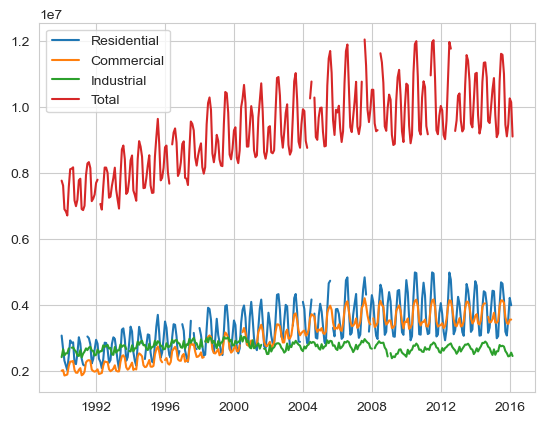

In [3]:
plt.figure()
plt.plot(dates, usage)
plt.legend(sectors.iloc[0])
plt.show()

One of the most common ways to normalize data is to shift it so that it's mean is centered on zero (i.e. the data has zero mean) and scale the data so that it's standard deviation is one. This is called the z-score of the data. To normalize data using z-scores, we can use the [zscore()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html#scipy-stats-zscore) function.

In [4]:
normalize_total = stats.zscore(total, nan_policy='omit')
normalize_total

,0,1,2,3
0,-0.398679,-1.567076,-2.247471,-1.218310
1,-0.993434,-1.541735,-0.524978,-1.340415
2,-1.479753,-1.790999,-1.862774,-1.921815
3,-1.688359,-1.771955,-1.412519,-1.978515
4,-1.894400,-1.743388,-1.417562,-2.077028
...,...,...,...,...
310,-0.396827,0.657718,-1.379381,-0.128155
311,0.318902,0.603550,-2.076734,0.172835
312,1.227277,0.802854,-1.991726,0.807112
313,0.910664,0.809304,-1.264836,0.713561


If we don't want to change the scale of the data, we can just center the data on zero by substracting the mean.

In [5]:
centered_usage = total - total.mean()
centered_usage

,0,1,2,3
0,-2.797941e+05,-1.020349e+06,-311972.511327,-1.497638e+06
1,-6.971941e+05,-1.003849e+06,-72872.511327,-1.647738e+06
2,-1.038494e+06,-1.166149e+06,-258572.511327,-2.362438e+06
3,-1.184894e+06,-1.153749e+06,-196072.511327,-2.432138e+06
4,-1.329494e+06,-1.135149e+06,-196772.511327,-2.553238e+06
...,...,...,...,...
310,-2.784941e+05,4.282512e+05,-191472.511327,-1.575379e+05
311,2.238059e+05,3.929812e+05,-288272.511327,2.124621e+05
312,8.613059e+05,5.227512e+05,-276472.511327,9.921621e+05
313,6.391059e+05,5.269512e+05,-175572.511327,8.771621e+05


How has the usage in each sector changed relative to the usage in 1990 when the first data point was recorded? We can normalize data by the first value in each column.

In [6]:
scaled_usage = usage / usage.iloc[0]
scaled_usage

,0,1,2,3
0,1.000000,1.000000,1.000000,1.000000
1,0.864397,1.008184,1.098582,0.980683
2,0.753517,0.927682,1.022017,0.888703
3,0.705955,0.933833,1.047786,0.879733
4,0.658978,0.943058,1.047497,0.864148
...,...,...,...,...
310,1.000422,1.718516,1.049683,1.172467
311,1.163607,1.701022,1.009772,1.220084
312,1.370716,1.765389,1.014637,1.320429
313,1.298528,1.767472,1.056238,1.305629


We can also stretch or compress data so that it's maximum and minimum values are within [-1, 1]. 

In [7]:
range_usage = 2 * (usage - usage.min()) / (usage.max() - usage.min()) - 1
range_usage

,0,1,2,3
0,-0.291437,-0.875310,-0.903045,-0.603858
1,-0.573188,-0.861199,-0.196275,-0.660187
2,-0.803571,-1.000000,-0.745197,-0.928397
3,-0.902393,-0.989395,-0.560449,-0.954554
4,-1.000000,-0.973488,-0.562518,-1.000000
...,...,...,...,...
310,-0.290560,0.363551,-0.546852,-0.100949
311,0.048500,0.333387,-0.832988,0.037903
312,0.478821,0.444368,-0.798108,0.330506
313,0.328833,0.447960,-0.499852,0.287349
